<a href="https://colab.research.google.com/github/MengChiehLiu/2023-NTU-ACCT-ML-camp/blob/main/codes_for_student/Advanced_python_programming_ipynb_%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NTU ACCT ML Camp: Advanced Python Programming
2022/3/3  
Meng-Chieh Liu  


## 1. Warmup

A shop keeper needs to decide which amount to produce based on the demand and the supply that he/she can optimize his/her profit. Please design a program to solve this question!  
Here is some basic information you need to know  
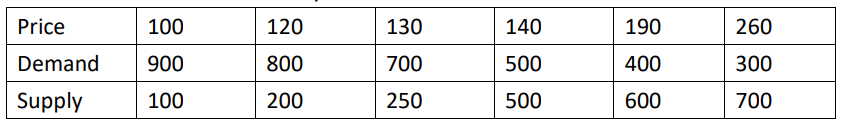

Notice: the shop keeper will produce the supply amount and buyer will buy the demand amount that is you need to consider whether there is an insufficient situation or not.

Besides, there are some other costs occurred during the production.  
1. Human Cost:  
\$20 when supply is equal or lower than 300 units    
\$50 when supply higher than 300 units (for all units)  
2. Production Cost: $60 per unit produced  


Please write a function to calculate profit with 3 input: price, demand, supply


In [ ]:
price = [100, 120, 130, 140, 190, 260]
demand = [900, 800, 700, 500, 400, 300]
supply = [100, 200, 250, 500, 600, 700]

In [ ]:
def getProfit(price, demand, supply):
  # write your code here
  return profit

In [ ]:
for i in range(6):
  profit = getProfit(price[i], demand[i], supply[i])
  print(f"Price:{price[i]}, Profit:{profit}")

Price:100, Profit:2000
Price:120, Profit:8000
Price:130, Profit:12500
Price:140, Profit:15000
Price:190, Profit:10000
Price:260, Profit:1000


## 2. Iteration & Recursion

Iteration and recursion are programming concepts used for repeating
instructions. Iteration uses loops for repeating instructions while recursion breaks
down a problem into smaller, simpler versions of itself.

### Fibonacci Numbers

The Fibonacci numbers, commonly denoted F(n) form a sequence, called the
Fibonacci sequence, such that each number is the sum of the two preceding
ones, starting from 0 and 1. That is,

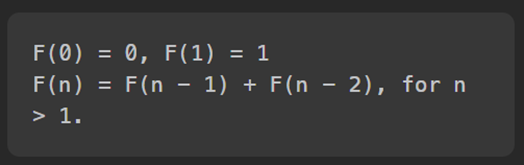

### Iteration

In [ ]:
def fibonacci(n):
    assert n >= 0, 'The input should be positive number.'
    if n < 2:
        return n
    prev = 0
    curr = 1
    for i in range(n-1):
      # prev, curr = curr, prev+curr
      temp = prev
      prev = curr
      curr += temp
    return curr

In [ ]:
fibonacci(10)

55

In [ ]:
fibonacci(-1)

AssertionError: ignored

### Recursion

In [ ]:
def fibonacci(n):
    if n < 0:
      raise ValueError("The input should be positive number.")
    if n < 2:
      return n
    else:
      return fibonacci(n-1) + fibonacci(n-2)

In [ ]:
fibonacci(10)

55

In [ ]:
fibonacci(-1)

ValueError: ignored

### Practice: Tribonacci Number


The Tribonacci sequence Tn is defined as follows:  
T0 = 0, T1 = 1, T2 = 1, and Tn+3 = Tn + Tn+1 + Tn+2 for n >= 0.  
Given n, return the value of Tn. (LeetCode 1137)


#### Iteration

In [ ]:
def tribonacci(n):
    # write your code here
    
    return answer

In [ ]:
tribonacci(10)

149

#### Recursion

In [ ]:
def tribonacci(n):
    # write your code here
    
    return answer

In [ ]:
tribonacci(10)

149

## 3. Decorator

### Introduction

A decorator in Python is a way to modify the behavior of a function without changing its code. It's like adding a wrapper around the function that can perform some additional actions before or after the function is called. Decorators are marked with the "@" symbol and are placed above the function they decorate. They are often used for tasks like logging, caching, or authentication.

In [ ]:
def my_decorator(func):
    def wrapper():
        print("Before the function is called.")
        func()
        print("After the function is called.")
    return wrapper

@my_decorator
def say_hello():
    print("Hello!")

say_hello()

Before the function is called.
Hello!
After the function is called.


### Caching


Caching is a technique used in programming to store frequently accessed data in a temporary storage area, improving application performance by reducing the time it takes to access data from the original source.

In [ ]:
import pickle
import hashlib
from time import time

In [ ]:
def fibonacci(n):
    if n < 0:
      raise ValueError("The input should be positive number.")
    if n < 2:
      return n
    else:
      return fibonacci(n-1) + fibonacci(n-2)

In [ ]:
def print_fibonacci(n):
  start = time()
  print(f"Answer {n}: {fibonacci(n)}")
  print("Time cost: {:.8f}".format(time() - start))

In [ ]:
print_fibonacci(10)
print_fibonacci(20)
print_fibonacci(30)
print_fibonacci(35)

Answer 10: 55
Time cost: 0.00020266
Answer 20: 6765
Time cost: 0.02399087
Answer 30: 832040
Time cost: 1.28124714
Answer 35: 9227465
Time cost: 17.79396081


If there are parameters in your function, you should also pass them into decorator. One common method is using \*args and \**kwargs to pass them.

In [ ]:
MEMO = {} # To remember the function input and output

def memoize(fn):
    def _deco(*args, **kwargs):
        # pickle the function arguments and obtain hash as the store keys
        key = (fn.__name__, hashlib.md5(pickle.dumps((args, kwargs), 4)).hexdigest())
        # check if the key exists
        if key in MEMO:
            ret = pickle.loads(MEMO[key])
        else:
            ret = fn(*args, **kwargs)
            MEMO[key] = pickle.dumps(ret)
        return ret
    return _deco

Let’s add a cache on the recursive Fibonacci function and see the result.

In [ ]:
@memoize
def fibonacci(n):
    if n < 2:
        return n
    else:
        return fibonacci(n-1) + fibonacci(n-2)

In [ ]:
print_fibonacci(10)
print_fibonacci(20)
print_fibonacci(30)
print_fibonacci(35)

Answer 10: 55
Time cost: 0.00062466
Answer 20: 6765
Time cost: 0.00018978
Answer 30: 832040
Time cost: 0.00018072
Answer 35: 9227465
Time cost: 0.00011086


In [ ]:
myIter = iter(MEMO.items())
next(myIter)

(('fibonacci', '635f1664f168e2a15b8e43f20d45154b'), b'\x80\x04K\x01.')

In fact, we can simply import tools to realize a cache.

In [ ]:
from functools import lru_cache

In [ ]:
@lru_cache(maxsize=None)
def fibonacci(n):
    if n < 2:
        return n
    else:
        return fibonacci(n-1) + fibonacci(n-2)

In [ ]:
print_fibonacci(10)
print_fibonacci(20)
print_fibonacci(30)
print_fibonacci(35)

Answer 10: 55
Time cost: 0.00762129
Answer 20: 6765
Time cost: 0.00008965
Answer 30: 832040
Time cost: 0.00158906
Answer 35: 9227465
Time cost: 0.00005460


### Logging

Logging is a programming technique for recording events during an application's execution to identify and debug problems. It involves writing messages to a log file with relevant information about the event.

In [ ]:
def timer(func):
  def wrap(*args, **kwargs):
    start = time()
    res = func(*args,  **kwargs)
    print("Time cost: {:.8f}".format(time() - start))
    return res
  return wrap

def funcName(func):
  def wrap(*args, **kwargs):
    print("Function name: {}".format(func.__name__))
    res = func(*args,  **kwargs)
    return res
  return wrap
  

In [ ]:
@timer
@funcName
def fibonacci(n):
    assert n >= 0, 'The input should be positive number.'
    if n < 2:
        return n
    prev = 0
    curr = 1
    for i in range(n-1):
      prev, curr = curr, prev+curr
    return curr

In [ ]:
fibonacci(10)

Function name: fibonacci
Time cost: 0.00111222


55

## 4. Data Structure and Algorithm

### Stack & Queue

#### Introduction

* A stack is a data structure that stores a collection of elements in a last-in, first-out (LIFO) order. This means that the last element added to the stack is the first element to be removed.
* A queue, on the other hand, is a data structure that stores a collection of elements in a first-in, first-out (FIFO) order. This means that the first element added to the queue is the first element to be removed.

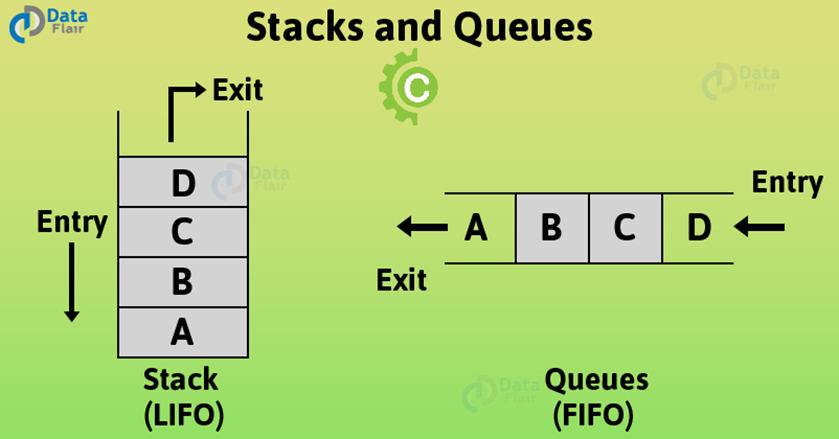

Image source: https://data-flair.training/blogs/stacks-and-queues-in-c/ 

#### Stack

In [ ]:
stack = []
stack.append(0)
stack.append(1)
stack.append(2)
stack.append(3)
stack

[0, 1, 2, 3]

In [ ]:
stack.pop()
stack

[0, 1, 2]

#### Queue

In [ ]:
from collections import deque

In [ ]:
queue = deque()
queue.append(0)
queue.append(1)
queue.append(2)
queue.append(3)
queue

deque([0, 1, 2, 3])

In [ ]:
queue.popleft()
queue

deque([1, 2, 3])

In [ ]:
queue.pop()
queue

deque([1, 2])

#### Practice: Valid Parentheses (Leetcode 20)

Given a string s containing just the characters '(', ')', '{', '}', '[' and ']', determine if the input string is valid.

An input string is valid if:

Open brackets must be closed by the same type of brackets.
Open brackets must be closed in the correct order.
Every close bracket has a corresponding open bracket of the same type.

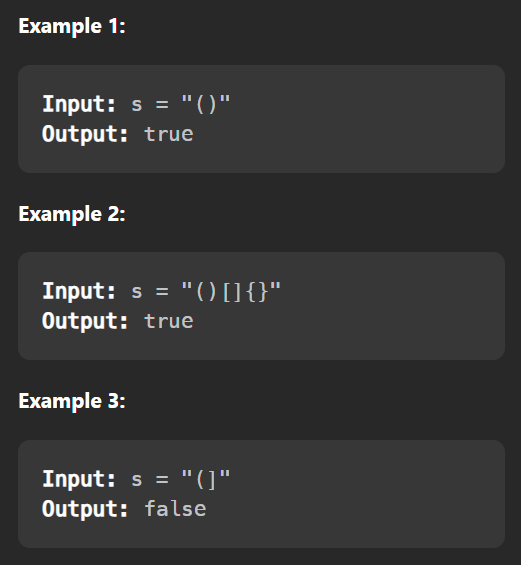

In [ ]:
def isValid(s: str) -> bool:
  # write your code here
  return answer

In [ ]:
# should return True
isValid("({[][{}()]})")

True

In [ ]:
# should return False
isValid("({[(])})")

False

### Binary Search

#### Introduction

Binary search is a search algorithm that efficiently finds the position of a value in a sorted list by repeatedly dividing the search interval in half. It has a time complexity of O(log n) and is commonly used in applications that involve searching or sorting large amounts of data.

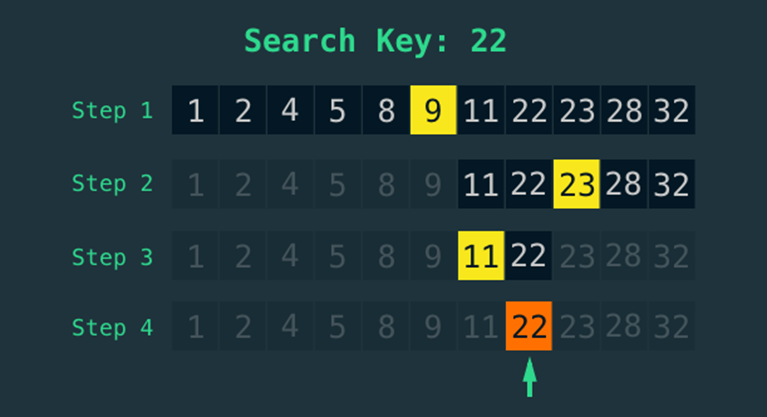

Image source: https://mikebuss.com/2016/04/21/binary-search/

We can simply use package to do binary search for us.

In [ ]:
import bisect

nums = [i*2 for i in range(30)]
target = 20
bisect.bisect_left(nums, target)

10

#### Practice: Binary Search

Design a program that:
1.	Create a list that contains 1000000 random integers with value between -10000000 and 10000000.
2.	Sort the list and set the maximum value as the target. (You can use any method)
3.	Find the target using Binary Search and record its time cost.
4.	Compare the time cost of using Binary Search with the time cost of searching from min to max.


In [ ]:
import random
nums = [random.randint(-10000000, 10000000) for _ in range(1000000)]
nums.sort()
target = nums[-1]

In [ ]:
def BinarySearch(nums: list, target: int) -> int:
    # write your code here
    # if find: return index
    # if not find: return -1
    return

In [ ]:
def LinearSearch(nums: list, target: int) -> int:
  for i, n in enumerate(nums):
    if n == target:
      return i
  return -1

In [ ]:
# Using LinearSearch
start = time()
LinearSearch(nums, target)
time() - start

In [ ]:
# Using BinarySearch
start = time()
BinarySearch(nums, target)
time() - start

## 5. Genetic Algorithm

### Introduction

Genetic Algorithm (GA) is a search-based optimization technique that mimics the process of natural selection and genetics in biology to find the optimal solution to a problem.  
There are five phases in a typical Genetic Algorithm (GA):
>1.	Initialization: A population of potential solutions to the problem is randomly generated.
2.	Fitness Evaluation: Each individual in the population is evaluated based on a fitness function that quantifies how well it solves the problem.
3.	Selection: The best individuals in the population are selected based on their fitness, and these individuals are used to create the next generation of individuals.
4.	Crossover/Reproduction: Two individuals are selected from the population and their genetic material is combined to create a new individual. This process is repeated until the desired number of offspring is generated.
5.	Mutation: A small percentage of individuals in the population have their genetic material randomly changed to introduce new variations into the population.

Steps 2-5 are repeated for a fixed number of generations or until a satisfactory solution is found.


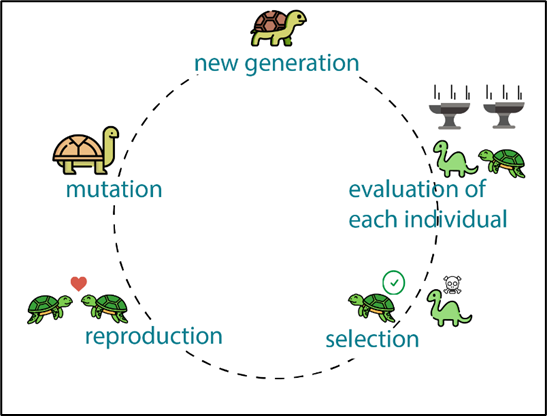

Image source: https://www.generativedesign.org/02-deeper-dive/02-04_genetic-algorithms/02-04-01_what-is-a-genetic-algorithm

### Python Practice: Single-Machine Scheduling Problem

Please answer following single-machine total weighted tardiness problem. The objective function is 
to minimize the total weighted tardiness.  

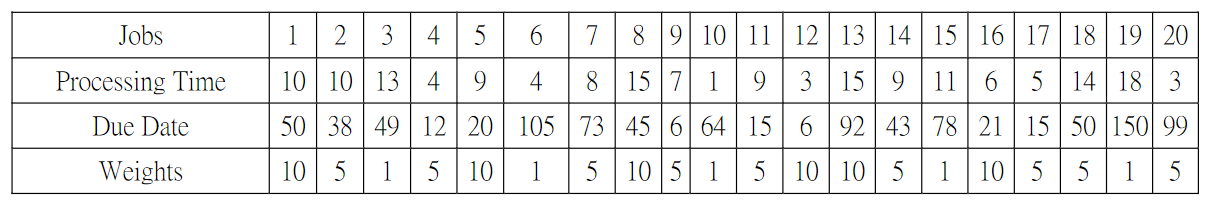

In [ ]:
!gdown https://drive.google.com/u/0/uc?id=1IdBasGgtPqSn58YX3IDYfSkYpQ4s_ZdW&export=download

Downloading...
From: https://drive.google.com/u/0/uc?id=1IdBasGgtPqSn58YX3IDYfSkYpQ4s_ZdW
To: /content/jobs.csv
100% 267/267 [00:00<00:00, 241kB/s]


In [ ]:
import pandas as pd
import random
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
instance_dict = pd.read_csv('jobs.csv', index_col = "Jobs").to_dict('index')

In [ ]:
instance_dict

{1: {'Processing_Time': 10, 'Due_Date': 50, 'Weights': 10},
 2: {'Processing_Time': 10, 'Due_Date': 38, 'Weights': 5},
 3: {'Processing_Time': 13, 'Due_Date': 49, 'Weights': 1},
 4: {'Processing_Time': 4, 'Due_Date': 12, 'Weights': 5},
 5: {'Processing_Time': 9, 'Due_Date': 20, 'Weights': 10},
 6: {'Processing_Time': 4, 'Due_Date': 105, 'Weights': 1},
 7: {'Processing_Time': 8, 'Due_Date': 73, 'Weights': 5},
 8: {'Processing_Time': 15, 'Due_Date': 45, 'Weights': 10},
 9: {'Processing_Time': 7, 'Due_Date': 6, 'Weights': 5},
 10: {'Processing_Time': 1, 'Due_Date': 64, 'Weights': 1},
 11: {'Processing_Time': 9, 'Due_Date': 15, 'Weights': 5},
 12: {'Processing_Time': 3, 'Due_Date': 6, 'Weights': 10},
 13: {'Processing_Time': 15, 'Due_Date': 92, 'Weights': 10},
 14: {'Processing_Time': 9, 'Due_Date': 43, 'Weights': 5},
 15: {'Processing_Time': 11, 'Due_Date': 78, 'Weights': 1},
 16: {'Processing_Time': 6, 'Due_Date': 21, 'Weights': 10},
 17: {'Processing_Time': 5, 'Due_Date': 15, 'Weights':

In [ ]:
class GeneticAlgorithm():
    def __init__(self, instance_dict:dict, crossover_rate:float =0.99, mutate_rate:float =0.01):
        self.instance_dict = instance_dict
        self.instance_num = len(instance_dict)

        self.population_size = None
        self.crossover_rate = crossover_rate
        self.mutate_rate = mutate_rate

        self.population = {}
        self.seen = set()
        self.fitnesses = []

        self.best_solution = None
        self.best_fitness = np.inf
        
    @staticmethod
    def encode(x:list) -> str:
        return '-'.join([str(i) for i in x])

    @staticmethod
    def decode(x:str) -> list:
        return [int(i) for i in x.split('-')]

    
    def get_fitness(self, solution: list) -> int:
        # write your code
        return

    def get_tardy_jobs(self, solution: list) -> int:
        t = 0 
        tardy_jobs = 0

        for job in solution:
            C_i = t + self.instance_dict[job]["Processing_Time"]
            d_i = self.instance_dict[job]["Due_Date"]

            if C_i > d_i:
                tardy_jobs +=1

            t = C_i

        return tardy_jobs


    def initialize(self, population_size:int =30, seed:int =666):
        
        # parameters
        self.population_size = population_size

        # initialize population
        solution = [i for i in range(1, 1+len(instance_dict))]
        while len(self.population) < population_size:
            
            random.seed(seed)
            random.shuffle(solution)
            fitness = self.get_fitness(solution)
            encode_solution = self.encode(solution)

            if encode_solution not in self.seen:
                self.population[encode_solution] = fitness
                self.seen.add(encode_solution)
                
                if fitness < self.best_fitness:
                    self.best_solution = solution
                    self.best_fitness = fitness

            seed += 1

        self.fitnesses.append(self.best_fitness)


    def mutate(self, solution: list) -> list:
        # write your code here
        return


    def crossover(self, parent1: list, parent2: list) -> list:
        # write your code here
        return


    def generate(self):

        next_generation = {}
        new_population = {}
        best_solution = None
        best_fitness = np.inf

        solutions, weights = zip(*self.population.items())
        probs = np.array(weights, dtype=float) / float(sum(weights))

        while len(next_generation) < self.population_size:

            # crossover
            if random.random() < self.crossover_rate:
                parent1, parent2 = np.random.choice(solutions, 2, p=probs)
                child = self.crossover(self.decode(parent1), self.decode(parent2))

                # mutate
                child = self.mutate(child)

                encode_child = self.encode(child)
                if encode_child not in self.seen:
                    fitness = self.get_fitness(child)

                    next_generation[encode_child] = fitness
                    self.seen.add(encode_child)

                    if fitness < best_fitness:
                        best_solution = encode_child
                        best_fitness = fitness

        self.fitnesses.append(best_fitness)
        if best_fitness < self.best_fitness:
            self.best_solution = best_solution
            self.best_fitness = best_fitness

        # selection
        while len(new_population) < self.population_size:
            solution1 = random.choice(list(self.population.keys()))
            solution2 = random.choice(list(next_generation.keys()))
            fitness_1 = self.population.pop(solution1)
            fitness_2 = next_generation.pop(solution2)
            if fitness_1 < fitness_2:
                new_population[solution1] = fitness_1
            else:
                new_population[solution2] = fitness_2
        
        self.population = new_population


    def iterate(self, times=100):
        for i in tqdm(range(times)):
            self.generate()

In [ ]:
population_size = 30
ga = GeneticAlgorithm(instance_dict=instance_dict, crossover_rate=0.99, mutate_rate=0.01)
ga.initialize(population_size=population_size, seed=888)
ga.iterate(times=120)
print("")
print(f"Best order: {ga.best_solution.replace('-','-->')}")
print(f"Weighted tardiness: {ga.best_fitness}")
print(f"Tardiness jobs: {ga.get_tardy_jobs(ga.decode(ga.best_solution))}")

100%|██████████| 120/120 [00:02<00:00, 41.66it/s]


Best order: 12-->17-->4-->5-->16-->9-->8-->1-->11-->10-->7-->13-->20-->14-->2-->18-->6-->15-->3-->19
Weighted tardiness: 1928
Tardiness jobs: 15
